## **Predictive Modelling of Customer Churn and Retention Strategies for a Telecommunication Company: An Analysis for Vodafone Corporation**
## BUSINESS UNDERSTANDING

As a leading telecommunication corporation recognizes the criticality of customer retention in sustaining business growth. The escalating issue of customer churn can have a detrimental impact on a company's revenue and profitability, as acquiring new customers is often more costly than retaining existing ones. To address this challenge, this project aims to assist a telecommunication company in analysing customer churn patterns, identifying factors influencing churn, and developing effective customer retention strategies by leveraging machine learning techniques.

The primary objective is to develop robust machine-learning models to predict customer churn accurately. By analysing historical customer data, the aim is to identify key indicators of churn and formulate targeted retention strategies to reduce customer attrition to achieve higher profitability.

This dataset contains different features information such as:

* Gender — Whether the customer is a male or a female

* SeniorCitizen — Whether a customer is a senior citizen or not

* Partner — Whether the customer has a partner or not (Yes, No)

* Dependents — Whether the customer has dependents or not (Yes, No)

* Tenure — Number of months the customer has stayed with the company

* Phone Service — Whether the customer has a phone service or not (Yes, No)

* MultipleLines — Whether the customer has multiple lines  

* InternetService — Customer’s internet service provider (DSL, Fiber Optic, No)

* OnlineSecurity — Whether the customer has online security or not (Yes, No, No Internet)

* OnlineBackup — Whether the customer has online backup or not (Yes, No, No Internet)

* DeviceProtection — Whether the customer has device protection or not (Yes, No, No internet service)

* TechSupport — Whether the customer has tech support or not (Yes, No, No internet)

* StreamingTV — Whether the customer has streaming TV or not (Yes, No, No internet service)

* StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet service)

* Contract — The contract term of the customer (Month-to-Month, One year, Two year)

* PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)

* Payment Method — The customer’s payment method (Electronic check, mailed check, Bank transfer(automatic), Credit 
card(automatic))

* MonthlyCharges — The amount charged to the customer monthly

* TotalCharges — The total amount charged to the customer

* Churn — Whether the customer churned or not (Yes or No)

##             HYPOTHESIS

* Null Hypothesis (H0): There is no significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).

* Alternative Hypothesis (H1): There is a significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).

## QUESTIONS

 
1. How do contract terms and payment methods correlate with customer churn?

2. Are there specific services that significantly impact churn rates?

3. Are there specific services that customers with longer contract terms tend to use more frequently?

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

5. Are senior citizens more or less likely to churn compared to non senior citizens?





## DATA UNDERSTANDING
## Importation

In [1]:
# Import necessary libraries for data handling 
import pyodbc
import pandas as pd
import numpy as np
from dotenv import dotenv_values

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# Machinelearning



# classification model from sklean


# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.base import TransformerMixin

# Hyperparameters Fine-tuning


# Other utilities
import os
import pickle





## Data Loading
#### **Training Set_1 (SQL)**

In [2]:
#PULLING VARIABLES from an environment
environment_variables = dotenv_values('.env')
 
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("Login")
password = environment_variables.get("password")
 
# defining a connection string for connecting to our SQL server datatbase
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
 
# establish a database connection using the 'pyodbc' library
connection = pyodbc.connect(connection_string)

In [3]:
query = 'SELECT * FROM dbo.LP2_Telco_churn_first_3000'

data1 = pd.read_sql(query,connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True



#### **Training Set_2 (CSV)**

In [4]:
data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# Checking the column headers for Data1
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking the column headers for Data2 
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### **Concatenating the dataset from the two sources into one dataframe**

In [7]:
df = pd.concat([data1,data2])

#reset index of the conc dataset
df = df.reset_index(drop=True)
df = pd.DataFrame(df)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


* INSIGHTS: The Variables; 'Churn', 'PaperlessBilling', 'StreamingMovies','StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'PhoneService', 'Dependents' and 'Partner' have inconsistent enteries (Yes, No, False and True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


* INSIGHTS: The above (.info()) shows that:
 
Categorical variable: SeniorCitizen column is of datatype int64.
Numeric variable: TotalCharges column is of datatype object.

The variables: MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection,
TechSupport, StreamingTV, StreamingMovies, TotalCharges and Churn have missing values.
 


In [9]:
# Change the datatype of the variable to a boolen
# df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# Change the datatype of the variable 'TotalCharges' to a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verify Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [10]:
# Standardizing the enteries in specific columns 
# list out the columns with inconsistent enteries
boolean_columns = ['Churn', 'PaperlessBilling', 'StreamingMovies','StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'PhoneService', 'Dependents', 'Partner']

# Iterate through each column and replace True/False with 'Yes'/'No'
for column in boolean_columns:
    df[column] = df[column].replace({True: 'Yes', False: 'No'})

# drop unneeded column
columns_drop = ['customerID']
df = df.drop(columns=columns_drop)

# Verify changes
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [11]:
# check for duplicates
dup = df.duplicated().sum()
print(f'This dataset has',dup,'duplicates')

This dataset has 10 duplicates


In [12]:
# Drop duplicates
df = df.drop_duplicates()

# reset the index
df = df.reset_index(drop=True)

# Verify Changes
ver = df.duplicated().sum()
print(f'This dataset has',ver,'duplicates')

This dataset has 0 duplicates


In [13]:
# check null values
df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [14]:
# Check the percentage of missing values
(df.isnull().sum()/(len(df)))*100

gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.344725
InternetService      0.000000
OnlineSecurity      12.835287
OnlineBackup        12.835287
DeviceProtection    12.835287
TechSupport         12.835287
StreamingTV         12.835287
StreamingMovies     12.835287
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.158951
Churn                0.019869
dtype: float64

In [15]:
# veiwing the type of null values 
selected_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']
df_selected = df[selected_columns]
df_selected


,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TotalCharges,Churn
0,None,No,Yes,No,No,No,No,29.850000,No
1,No,Yes,No,Yes,No,No,No,1889.500000,No
2,No,Yes,Yes,No,No,No,No,108.150002,Yes
3,None,Yes,No,Yes,Yes,No,No,1840.750000,No
4,No,No,No,No,No,No,No,151.649994,Yes
...,...,...,...,...,...,...,...,...,...
5028,Yes,Yes,No,Yes,Yes,Yes,Yes,1990.500000,No
5029,Yes,No,Yes,Yes,No,Yes,Yes,7362.900000,No
5030,No phone service,Yes,No,No,No,No,No,346.450000,No
5031,Yes,No,No,No,No,No,No,306.600000,Yes


In [25]:
# View the unique enteries in the selected columns
print("Unique values in 'Churn' column:")
print(df_selected['Churn'].unique())

print("\nUnique values in 'MultipleLines' column:")
print(df_selected['MultipleLines'].unique())

print("\nUnique values in 'OnlineSecurity' column:")
print(df_selected['OnlineSecurity'].unique())

print("\nUnique values in 'OnlineBackup' column:")
print(df_selected['OnlineBackup'].unique())

print("\nUnique values in 'DeviceProtection' column:")
print(df_selected['DeviceProtection'].unique())

print("\nUnique values in 'TechSupport' column:")
print(df_selected['TechSupport'].unique())

print("\nUnique values in 'StreamingTV' column:")
print(df_selected['StreamingTV'].unique())

print("\nUnique values in 'StreamingMovies' column:")
print(df_selected['StreamingMovies'].unique())

print("\nUnique values in 'StreamingTV' column:")
print(df_selected['StreamingTV'].unique())

Unique values in 'Churn' column:
['No' 'Yes' None]

Unique values in 'MultipleLines' column:
[None 'No' 'Yes' 'No phone service']

Unique values in 'OnlineSecurity' column:
['No' 'Yes' None 'No internet service']

Unique values in 'OnlineBackup' column:
['Yes' 'No' None 'No internet service']

Unique values in 'DeviceProtection' column:
['No' 'Yes' None 'No internet service']

Unique values in 'TechSupport' column:
['No' 'Yes' None 'No internet service']

Unique values in 'StreamingTV' column:
['No' 'Yes' None 'No internet service']

Unique values in 'StreamingMovies' column:
['No' 'Yes' None 'No internet service']

Unique values in 'StreamingTV' column:
['No' 'Yes' None 'No internet service']


* INSIGHTS: 
* The percentage of missing values is ~5% for MultipleLines and ~13% for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies. 
* Null values are of the type 'None' and not 'NaN'.

In [26]:
# Replace 'None' with NaN for consistency
df.replace({None: np.nan}, inplace=True)

## EDA

In [154]:
# Getting the summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


* INSIGHTS: 
1. **Tenure:**

* The average tenure of customers is around 32.58 months, with a wide range from 0 to 72 months.
* The majority of customers have a tenure below the 75th percentile (56 months), as indicated by the relatively lower median (29 months).

2. **Monthly Charges:**

* The average monthly charge is $65.09, with a standard deviation of $30.07.
* Monthly charges range from $18.40 to $118.65, indicating variability in pricing.
* The median monthly charge is $70.55, which is higher than the mean, suggesting a right-skewed distribution.

3. **Total Charges:**

* The total charges have a wide range, with an average of $2302.06 and a standard deviation of $2269.48.
* Some customers have significantly higher total charges, as indicated by the high maximum value of $8670.10.
* There is a noticeable difference between the median ($1401.15) and mean, suggesting potential skewness or possible outliers.

In [156]:
# Seperating Numerical and categorical variables for easy analysis
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Univariate Analysis

SeniorCitizen
Skew : 1.83


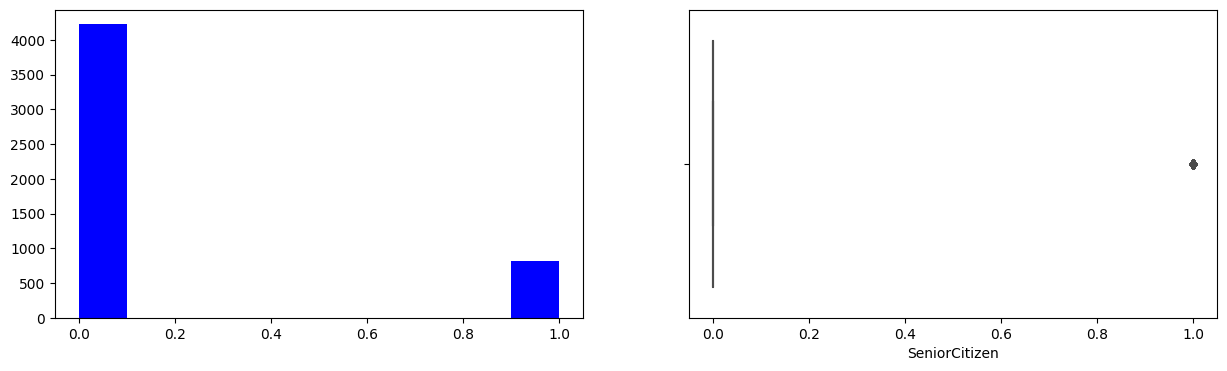

tenure
Skew : 0.23


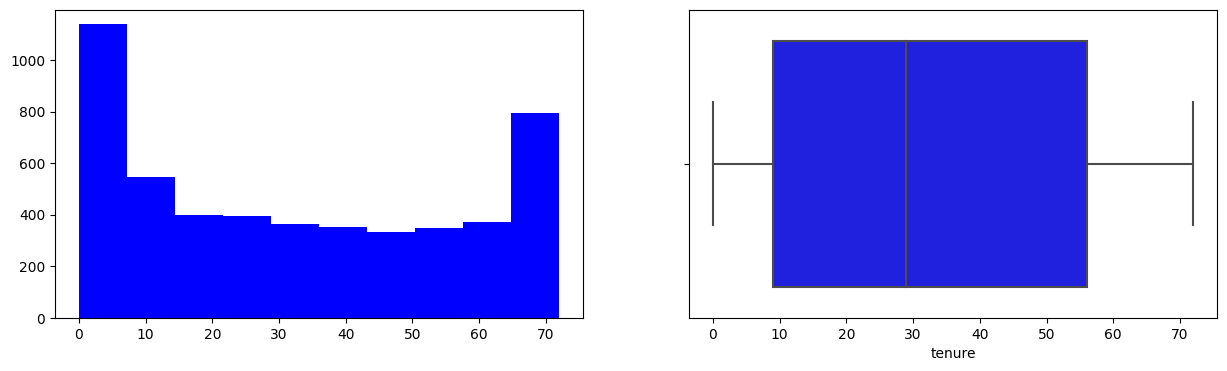

MonthlyCharges
Skew : -0.24


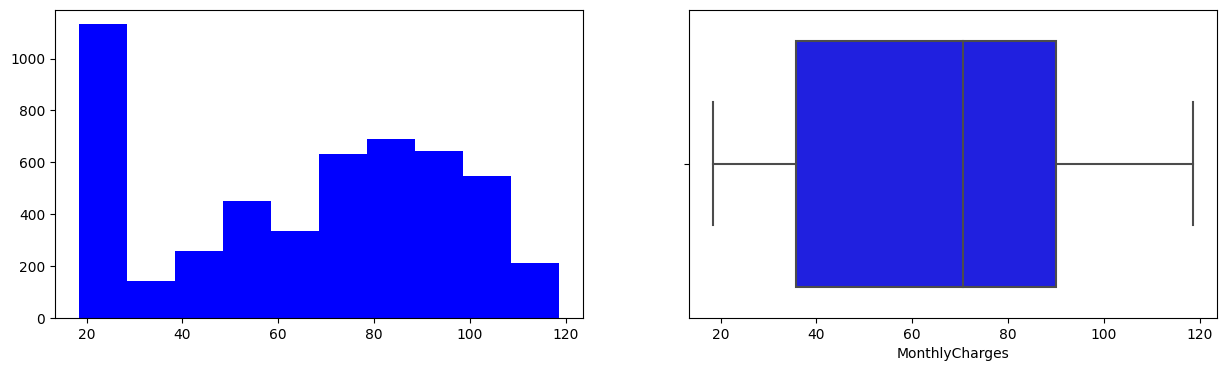

TotalCharges
Skew : 0.94


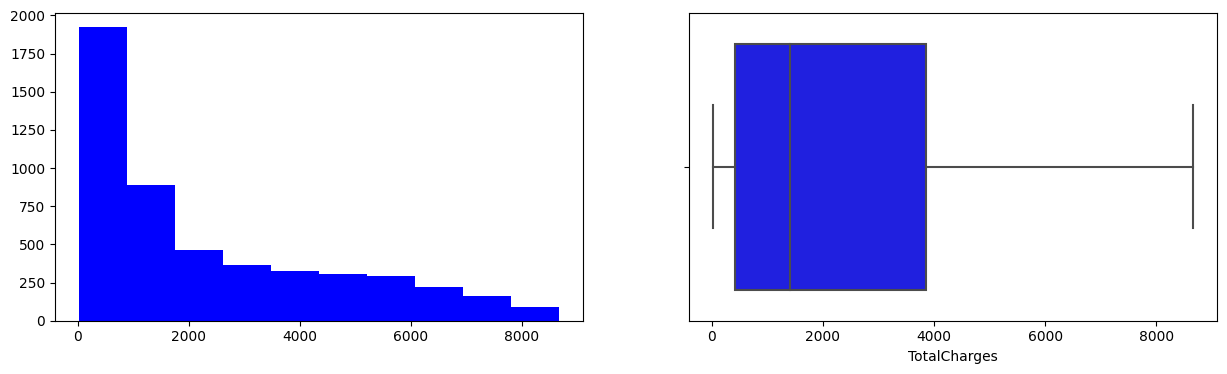

In [157]:
# Visualizing the distribution of the numerical columns using histogram and box plot side by side while printing the skewness
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, color ="blue")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='blue')
    plt.show()

* INSIGHTS: The visualization reveals the distributions of continuous numerical columns are notably uneven, predominantly exhibiting positive skewness with monthly Charges negatively skewed. This observation suggests that these columns may benefit from transformations to achieve a more balanced distribution, which can positively impact the performance of machine learning models.

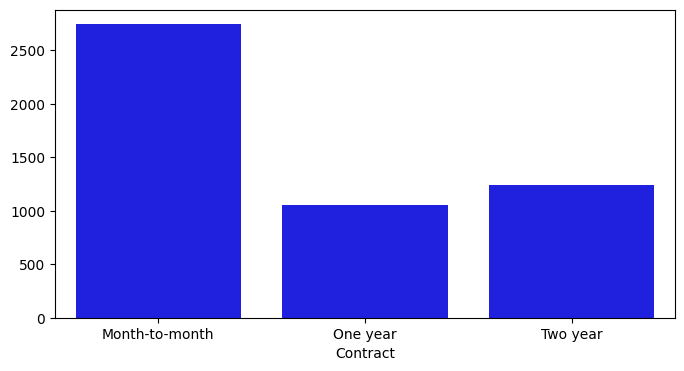

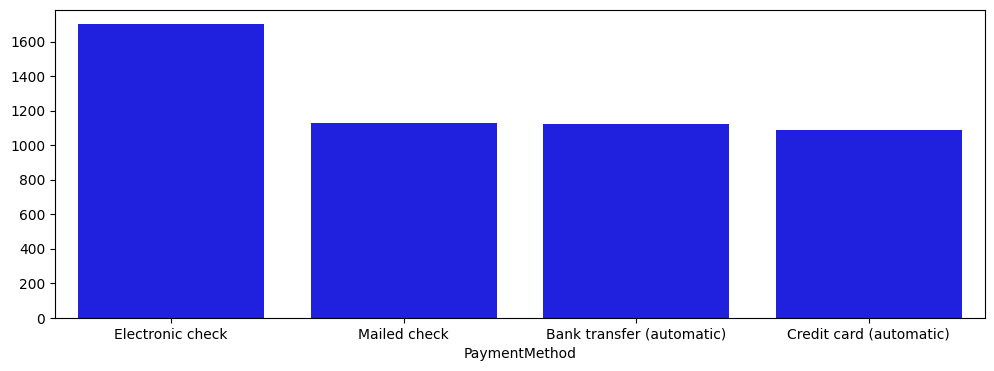

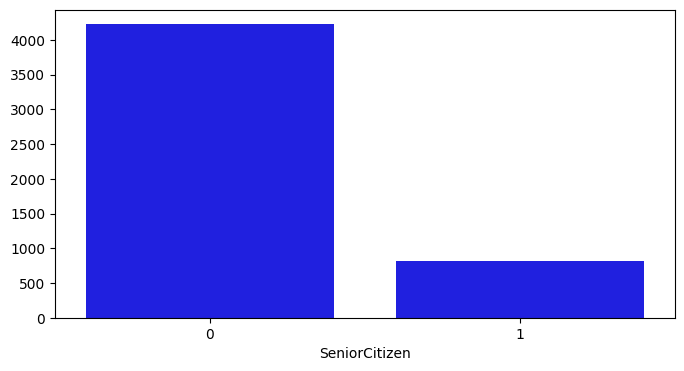

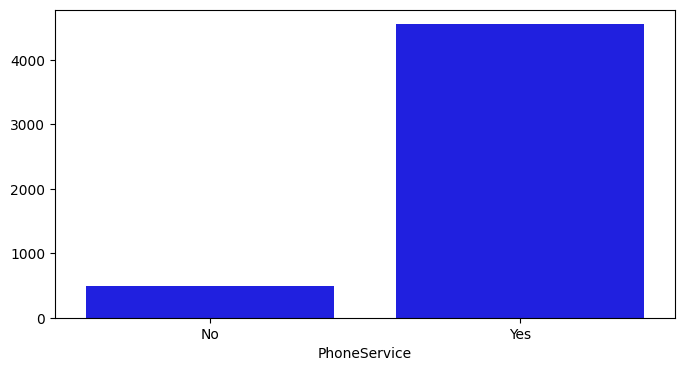

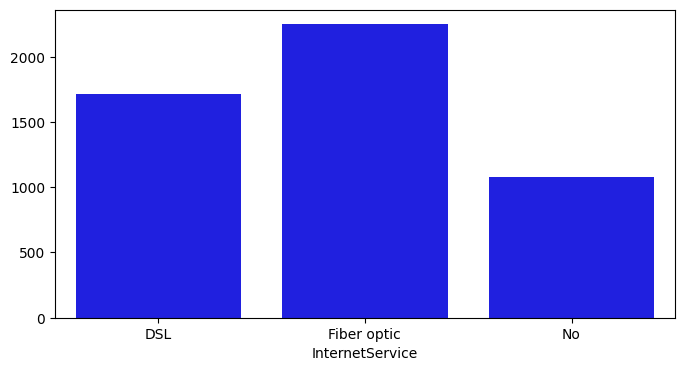

In [158]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = df, x="Contract",color = "blue")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(12,4))
ax = sns.countplot(x ="PaymentMethod", data = df, color = "blue")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(x="SeniorCitizen",data= df,color = "blue")
ax.set(ylabel=None)
plt.show()


plt.figure(figsize=(8,4))
ax = sns.countplot(x="PhoneService",data= df,color = "blue")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(x="InternetService",data= df,color = "blue")
ax.set(ylabel=None)
plt.show()

* INSIGHT: The visualization reveals skewness in majority of the categories. This imbalance in our key features may adversely impact the quality and predictive accuracy of our model, emphasizing the need for balance to enhance model performance.

### Bi-variate Analysis

In [159]:
# relationship among features
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


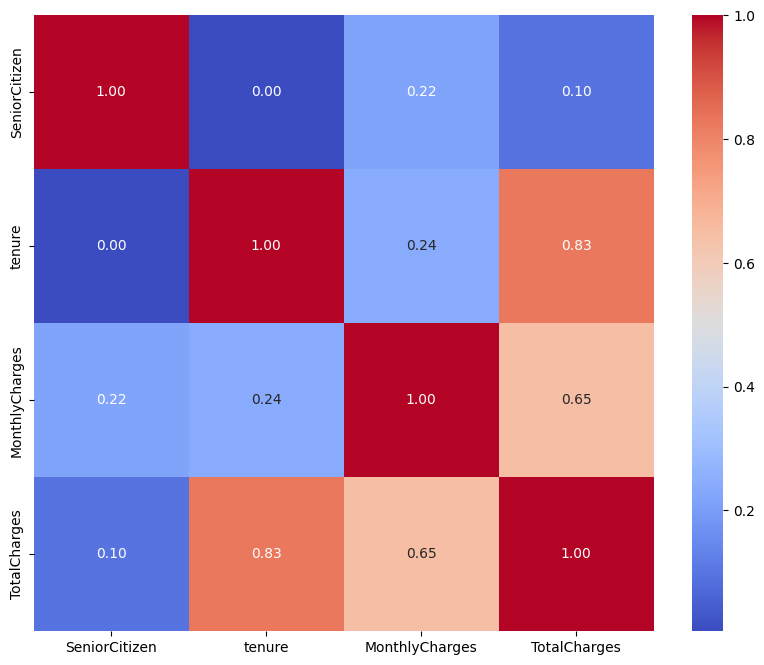

In [160]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: The correlation matrix reveals positive correlations between tenure and both monthly and total charges, with a stronger correlation observed between tenure and total charges, while senior citizenship exhibits a modest positive correlation with both monthly and total charges in the dataset

In [161]:
# Create a contingency table 
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
contingency_table 

Churn,No,Yes
Contract,,
Month-to-month,1560,1184
One year,933,122
Two year,1213,30


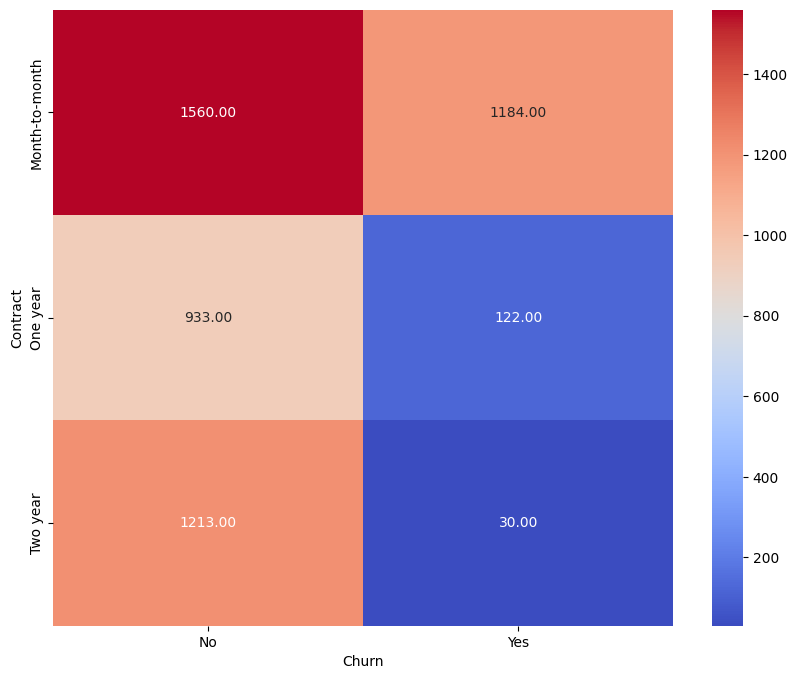

In [162]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: Customers with month-to-month contracts exhibit the highest churn rate, suggesting that this contract type may be associated with a greater likelihood of customer attrition. In contrast, customers with two-year contracts show a substantially lower churn rate, indicating a potential correlation between contract duration and customer retention. This insight emphasizes the importance of considering contract terms when analyzing and addressing customer churn in the dataset and thus, aligns closely with our hypothesis

In [163]:
# Create a contingency table 
contingency_table2 = pd.crosstab(df['PaymentMethod'], df['Churn'])
contingency_table2 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),927,198
Credit card (automatic),922,168
Electronic check,941,758
Mailed check,916,212


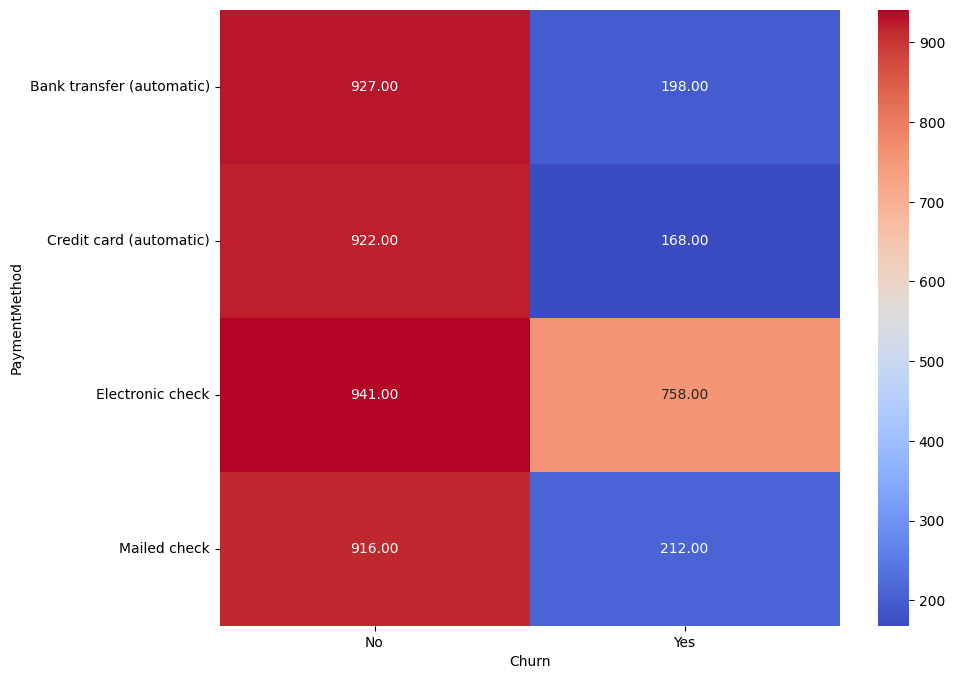

In [164]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table2, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: The observed variations in churn across different payment methods, notably higher churn among customers using Electronic check compared to Bank transfer (automatic), Credit card (automatic), and Mailed check, indicate that the choice of payment method could be a significant factor influencing customer churn. These findings offer valuable insights for further investigation and validation of our initial hypothesis.

### Multivariate Analysis

<Figure size 1000x800 with 0 Axes>

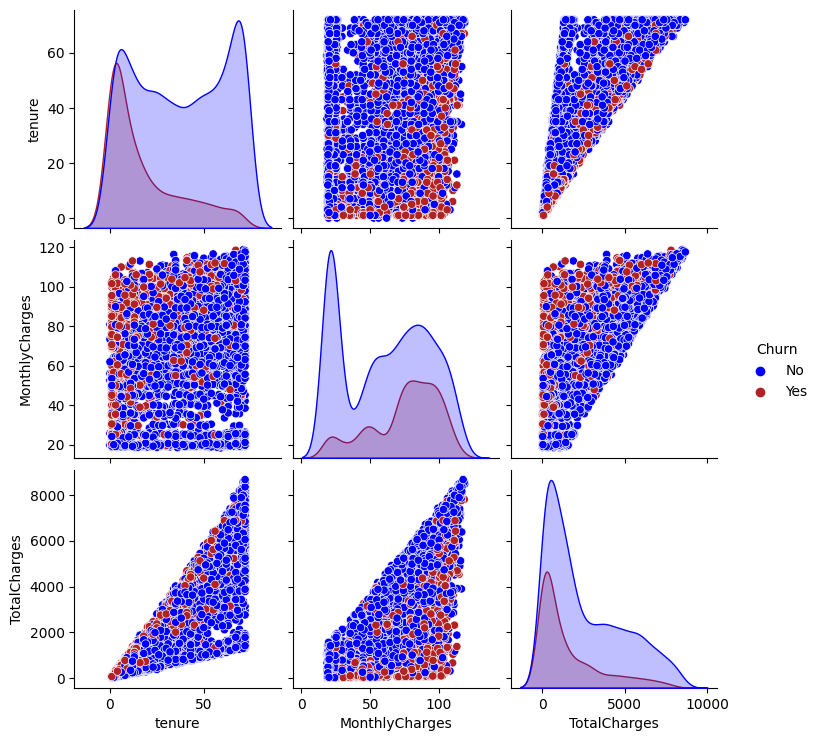

In [165]:
data = df[["tenure","MonthlyCharges",'TotalCharges','Churn']]
plt.figure(figsize=(10, 8))
sns.pairplot(data, palette={'Yes':'Firebrick', 'No':'blue'}, hue = 'Churn')
plt.show()

In [29]:
# Defining mode value
most_frequent = df['Churn'].mode()[0]

# Filling null values in 'Churn' column with the most frequent value
df['Churn'].fillna(most_frequent, inplace=True)

# Verfiy Changes
df['Churn'].isnull().sum()

0

### Rename and handle null values and save the clean dataframe to excel file

In [30]:
df_preprocessed = pd.DataFrame(df)

# Check for null values after preprocessing
print("Null values after preprocessing:\n", df_preprocessed.isnull().sum())


Null values after preprocessing:
 gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 0
dtype: int64


In [31]:
# Specify columns with missing values
numerical_cols = ['TotalCharges']
categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='median')
df_preprocessed[numerical_cols] = numerical_imputer.fit_transform(df_preprocessed[numerical_cols])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_preprocessed[categorical_cols] = categorical_imputer.fit_transform(df_preprocessed[categorical_cols])

# Verify Changes
print("Null values after preprocessing:\n", df_preprocessed.isnull().sum())


Null values after preprocessing:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [32]:
# Saving the DataFrame to an Excel file
desktop_path = r'C:\Users\USER\Desktop'
file_path = desktop_path + r'\df_preprocessed.xlsx'

df_preprocessed.to_excel(file_path, index=False)

## Answering Business Questions

1. How do contract terms and payment methods correlate with customer churn?

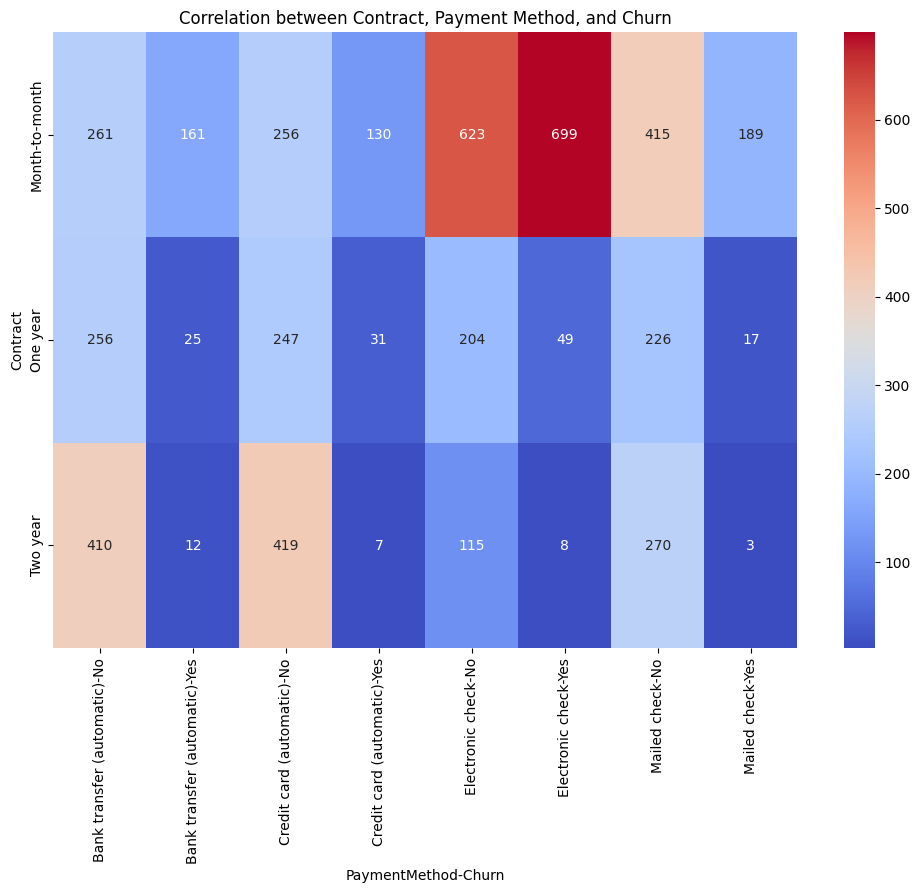

In [33]:
#  a contingency table
contingency_table3 = pd.crosstab(index=df_preprocessed['Contract'], columns=[df_preprocessed['PaymentMethod'], df_preprocessed['Churn']])


# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table3, annot=True, cmap='coolwarm', fmt='g')
plt.title('Correlation between Contract, Payment Method, and Churn')
plt.show()

**INSIGHTS:**
1. **Payment Method Impact:**
Customers using "Electronic check" as their payment method exhibit a higher churn rate compared to other methods.
Customers using "Bank transfer (automatic)" and "Credit card (automatic)" generally have lower churn rates.

2. **Contract Duration:**
Customers with a "Two-year" contract have the lowest churn rate across all payment methods, indicating that longer-term contracts are associated with higher customer retention.
"Month-to-month" contract customers show higher churn rates, emphasizing the importance of contract duration in customer retention.

3. **Churn Across Payment Methods:**
Among customers with "Month-to-month" contracts, "Electronic check" users experience the highest churn, while "Bank transfer (automatic)" users have a comparatively lower churn rate.

4. **Variability in Churn Rates:**
Churn rates vary significantly across different contract durations and payment methods, underscoring the importance of understanding these factors when devising customer retention strategies.

    In summary, the data suggests a correlation between payment methods, contract duration, and customer churn. Exploring strategies to encourage longer-term contracts and promoting specific payment methods might help mitigate churn and enhance overall customer retention.

2. Are there specific services that significantly impact churn rates?

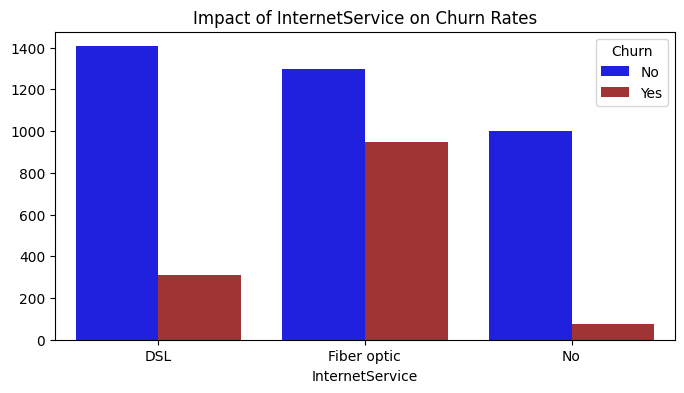

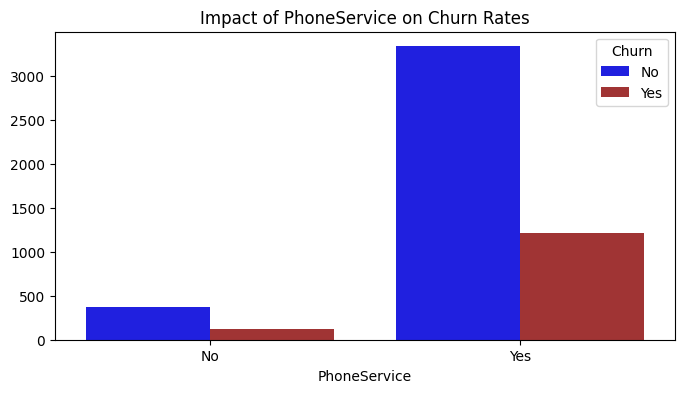

In [34]:
# bar plot
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='InternetService', hue='Churn', data=df_preprocessed, palette={'Yes':'Firebrick', 'No':'blue'})
ax.set(ylabel=None)
plt.title('Impact of InternetService on Churn Rates')
plt.show()

# bar plot 
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='PhoneService', hue='Churn', data=df_preprocessed, palette={'Yes':'Firebrick', 'No':'blue'})
ax.set(ylabel=None)
plt.title('Impact of PhoneService on Churn Rates')
plt.show()

**INSIGHTS:** 
The visualization indicates that the selected services; InternetService and PhoneService, have a notable impact on the churn rate. The predominance of "No Churn" in the visualization implies that customers utilizing these services are less likely to churn. This observation aligns with the understanding that specific services indeed play a significant role in influencing customer churn rates

3. Are there specific services that customers with longer contract terms tend to use more frequently?

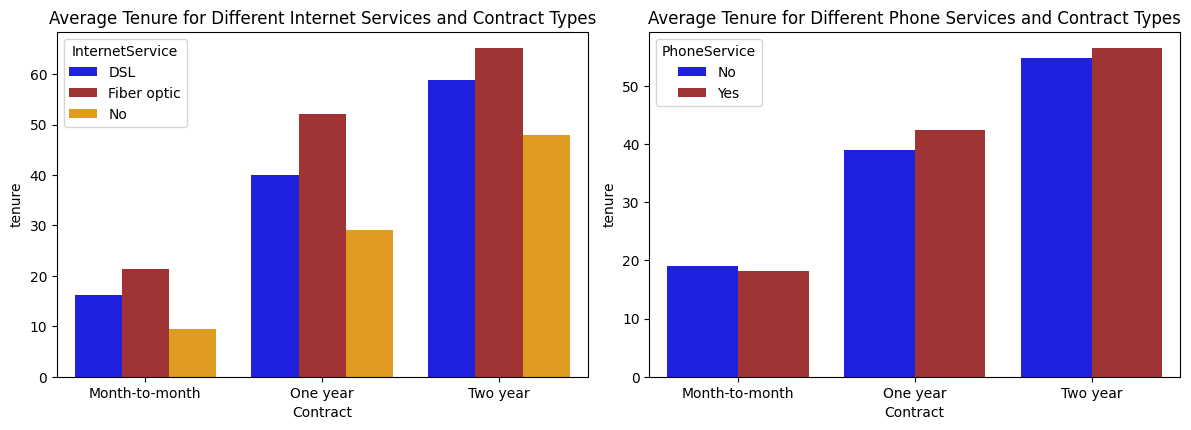

In [35]:
plt.figure(figsize=(12, 8))

# InternetService
plt.subplot(2, 2, 1)
sns.barplot(x='Contract', y='tenure', hue='InternetService', data=df_preprocessed, ci= None, palette={'Fiber optic':'Firebrick','DSL':'blue','No':'orange'})
plt.title('Average Tenure for Different Internet Services and Contract Types')

# PhoneService
plt.subplot(2, 2, 2)
sns.barplot(x='Contract', y='tenure', hue='PhoneService', data=df_preprocessed, ci= None, palette={'Yes':'Firebrick', 'No':'blue'})
plt.title('Average Tenure for Different Phone Services and Contract Types')

plt.tight_layout()
plt.show()


**INSIGHTS:**
Examining the bar plot for two services; specifically (InternetService) and (PhoneService), reveals that customers with extended contract terms predominantly choose Fiber Optic for internet service and use phone services more frequently. This observation implies a positive correlation between longer contract terms and increased usage of these selected services.

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

In [36]:
fig = px.histogram(df_preprocessed, x='PaymentMethod', color='Churn', barmode='stack',
                   color_discrete_map={'Yes':'Firebrick', 'No':'blue'},
                   labels={'PaymentMethod': 'Payment Method', 'Churn': 'Churn'},
                   title='Churn Patterns by Payment Method')

fig.update_layout(xaxis_title='Payment Method', yaxis_title='Count', showlegend=True)
fig.show()

**INSIGHTS:**
Analyzing the varied churn patterns associated with different customer payment methods, it becomes apparent that customers utilizing the (automatic) payment method tend to exhibit a pattern of 'No churn' (retaining services). In contrast, the (Electronic check) payment method displays a pattern of 'Yes churn' (churning). This observation aligns with the initial hypothesis, offering valuable insights into the relationship between payment methods and churn behavior.

5. Are senior citizens more or less likely to churn compared to non senior citizens?

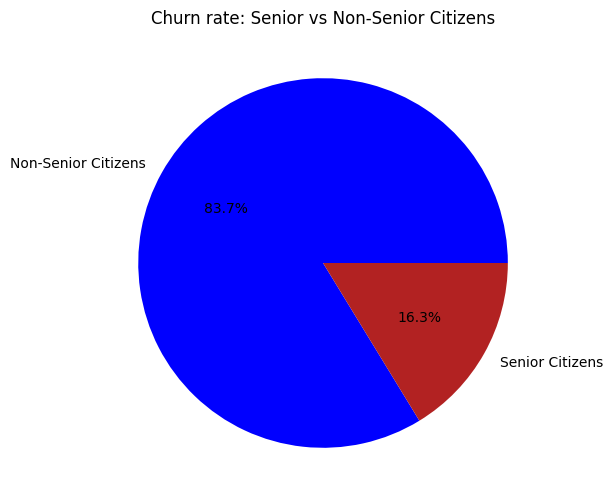

In [37]:
# Create a DataFrame with churn counts for senior and non-senior citizens
churn_counts = df_preprocessed['SeniorCitizen'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Non-Senior Citizens', 'Senior Citizens'], autopct='%1.1f%%', colors=['blue', 'Firebrick'])
plt.title('Churn rate: Senior vs Non-Senior Citizens')
plt.show()


**INSIGHTS:**
The chart above indicates that Senior Citizens have a churn rate of 16.3%, while non-Senior Citizens have a higher churn rate of 83.7%. Therefore, Senior Citizens are more likely to remain customers (as lower churn rate indicates a higher likelihood of customer retention) compared to non-Senior Citizens. This insight can be leveraged for strategic considerations, recognizing the lower churn rate among Senior Citizens."

# Hypothesis Testing

## Data Preparation

In [173]:
# Change the datatype of the variable 'TotalCharges' to a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Split data into input (x) and target (y) features

In [174]:
# Drop unnecessary columns and split the data
X = df.drop(['Churn'], axis=1)  # Features
y = df['Churn']  # Target variable

# Convert boolean values to strings
y_stratify = y.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_stratify)

### Feature Engineering

In [175]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [176]:
X_num_cols = X.select_dtypes(include=np.number).columns

X_cat_cols = X.select_dtypes(include=['object']).columns

# Verify changes
print("Categorical Variables:")
print(X_cat_cols)
print("Numerical Variables:")
print(X_num_cols)

Categorical Variables:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical Variables:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


#### Creating a pipeline

In [177]:
# LogTransformer class
class LogTransformer:
    def __init__(self, constant=1):
        self.constant = constant
 
    def transform(self, X_train):
        return np.log1p(X_train + self.constant)
 
 
# Numerical transformer with LogTransformer
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(LogTransformer().transform)),
    ('scaler', StandardScaler())
])
 
class BooleanToStringTransformer(TransformerMixin):
    def fit(self, X, y=None):
        # Fit logic here, if needed
        return self
 
    def transform(self, X):
        # Transformation logic here
        # Ensure to return the transformed data
        return X.astype(str)
 
 
# Categorical transformer
categorical_pipeline = Pipeline(steps=[
    ('bool_to_str', BooleanToStringTransformer()),
    ('cat_imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('cat_encoder', OneHotEncoder())
])
 
 
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, X_num_cols),
        ('cat', categorical_pipeline, X_cat_cols)
    ])

#### Decision Tree Model

In [178]:
#train a decision tree model
decision_tree_pipeline =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002673557B190>>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges',...
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [179]:
# Make predictions on test data
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7175421209117938
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.78      0.80       742
         Yes       0.47      0.55      0.51       267

    accuracy                           0.72      1009
   macro avg       0.65      0.67      0.66      1009
weighted avg       0.73      0.72      0.72      1009


Confusion Matrix:
[[576 166]
 [119 148]]


#### logistic regression model

In [180]:
# training a logistic regression model
# Create a full pipeline including numerical transformation and Logistic Regression model
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
 
# Fit the pipeline on the training data
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002673557B190>>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges',...
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [181]:
# Make predictions on test data
y_pred = logistic_pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7998017839444995
Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.89      0.87       742
         Yes       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009


Confusion Matrix:
[[658  84]
 [118 149]]


#### K-nearest neighbour model

In [182]:
# training a K-nearest neighbour model
 
KNN_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
   
])
# Fit the pipeline on the training data
KNN_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002673557B190>>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges',...
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [183]:
# Make predictions on test data
y_pred = KNN_pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7670961347869177
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.85      0.84       742
         Yes       0.56      0.54      0.55       267

    accuracy                           0.77      1009
   macro avg       0.70      0.69      0.70      1009
weighted avg       0.76      0.77      0.77      1009


Confusion Matrix:
[[631 111]
 [124 143]]


#### Support Vector Machines (SVM) model

In [184]:
#train an SVM model
 
SVM_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
   
])
# Fit the pipeline on the training data
SVM_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002673557B190>>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges',...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC())])

In [185]:
# Make predictions on test data
y_pred = SVM_pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.800792864222002
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87       742
         Yes       0.66      0.50      0.57       267

    accuracy                           0.80      1009
   macro avg       0.75      0.71      0.72      1009
weighted avg       0.79      0.80      0.79      1009


Confusion Matrix:
[[674  68]
 [133 134]]


#### Stochastic Gradient Descent (SGD) model

In [186]:

# Create a full pipeline including numerical transformation and SGD Classifier model
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(random_state=42))
])
 
# Fit the pipeline on the training data
sgd_pipeline.fit(X_train, y_train)
 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000002673557B190>>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges',...
                                                                                 strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SGDClassifier(random_state=42))])

In [187]:
# Make predictions on test data
y_pred = sgd_pipeline.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7849355797819624
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.87      0.86       742
         Yes       0.60      0.56      0.58       267

    accuracy                           0.78      1009
   macro avg       0.72      0.71      0.72      1009
weighted avg       0.78      0.78      0.78      1009


Confusion Matrix:
[[643  99]
 [118 149]]
